In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('Final Dataset.csv')

In [ ]:
#Sum power consumption by hr to consumption by day
df['Datetime'] = pd.to_datetime(df['Datetime'])
df=df.set_index('Datetime')
df_daily=df.resample('D').sum()

In [ ]:
df = df_daily

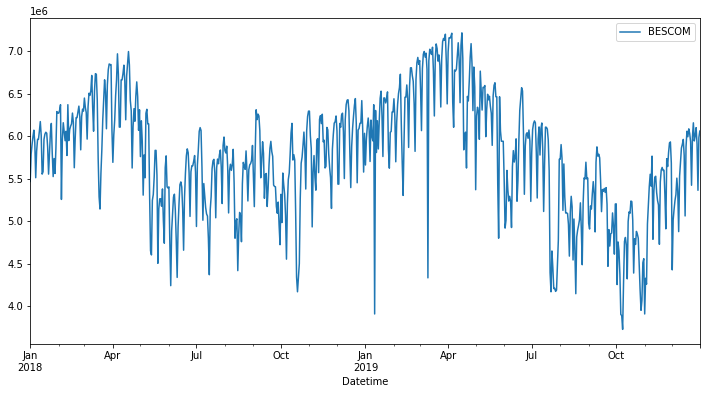

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

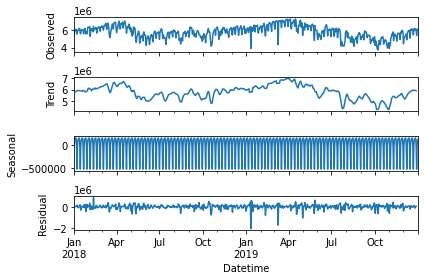

In [ ]:
results = seasonal_decompose(df['BESCOM'])
results.plot();

In [ ]:
len(df)

730

In [ ]:
train = df.iloc[:550]
test = df.iloc[550:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(),df.tail()

(                  BESCOM
 Datetime                
 2018-01-01  5.465430e+06
 2018-01-02  5.785545e+06
 2018-01-03  5.898176e+06
 2018-01-04  5.992804e+06
 2018-01-05  6.069460e+06,                   BESCOM
 Datetime                
 2019-12-27  6.099080e+06
 2019-12-28  5.907196e+06
 2019-12-29  5.361519e+06
 2019-12-30  5.982055e+06
 2019-12-31  6.058901e+06)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.47128124],
       [0.56803053],
       [0.60207127],
       [0.6306708 ],
       [0.65383874],
       [0.6101148 ],
       [0.48468861],
       [0.57913457],
       [0.62115192],
       [0.62115192]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 30
n_features = 1 #univariate timeseries
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.47128124 0.56803053 0.60207127 0.6306708  0.65383874 0.6101148
 0.48468861 0.57913457 0.62115192 0.62115192 0.65043914 0.68439431
 0.63443795 0.49753762 0.50580094 0.62095492 0.63945627 0.64647793
 0.64297297 0.5936708  0.49753762 0.57564293 0.64514469 0.67785743
 0.57126698 0.48871512 0.55288482 0.49978188 0.58958173 0.72004066]
Predict this y: 
 [[0.71434806]]


In [ ]:
X.shape

(1, 30, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 30
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(10))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(generator,epochs=70)

Epoch 1/70
520/520 [==============================] - 7s 11ms/step - loss: 0.0256
Epoch 2/70
520/520 [==============================] - 6s 11ms/step - loss: 0.0187
Epoch 3/70
520/520 [==============================] - 6s 12ms/step - loss: 0.0178
Epoch 4/70
520/520 [==============================] - 6s 11ms/step - loss: 0.0164
Epoch 5/70
520/520 [==============================] - 5s 11ms/step - loss: 0.0163
Epoch 6/70
520/520 [==============================] - 6s 11ms/step - loss: 0.0152
Epoch 7/70
520/520 [==============================] - 6s 11ms/step - loss: 0.0154
Epoch 8/70
520/520 [==============================] - 6s 11ms/step - loss: 0.0144
Epoch 9/70
520/520 [==============================] - 6s 11ms/step - loss: 0.0146
Epoch 10/70
520/520 [==============================] - 6s 11ms/step - loss: 0.0150
Epoch 11/70
520/520 [==============================] - 6s 11ms/step - loss: 0.0138
Epoch 12/70
520/520 [==============================] - 6s 11ms/step - loss: 0.0146
Epoch 13/70
5

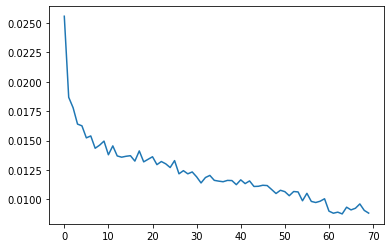

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-30:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

array([[0.6939862]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.68005867])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.6939862], dtype=float32),
 array([0.62665755], dtype=float32),
 array([0.49995607], dtype=float32),
 array([0.6245828], dtype=float32),
 array([0.7003661], dtype=float32),
 array([0.6703511], dtype=float32),
 array([0.6471145], dtype=float32),
 array([0.61404335], dtype=float32),
 array([0.5239088], dtype=float32),
 array([0.4522916], dtype=float32),
 array([0.55789554], dtype=float32),
 array([0.63369364], dtype=float32),
 array([0.629197], dtype=float32),
 array([0.6417342], dtype=float32),
 array([0.637419], dtype=float32),
 array([0.5503676], dtype=float32),
 array([0.4394921], dtype=float32),
 array([0.57098556], dtype=float32),
 array([0.61912507], dtype=float32),
 array([0.6082487], dtype=float32),
 array([0.59599894], dtype=float32),
 array([0.57912624], dtype=float32),
 array([0.50702566], dtype=float32),
 array([0.43701702], dtype=float32),
 array([0.5490996], dtype=float32),
 array([0.59152126], dtype=float32),
 array([0.5979897], dtype=float32),
 array([0.6005772]

In [ ]:
test.head()

,BESCOM
Datetime,
2019-07-05,6.156214e+06
2019-07-06,5.811105e+06
2019-07-07,5.271376e+06
2019-07-08,5.963573e+06
2019-07-09,6.107762e+06


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


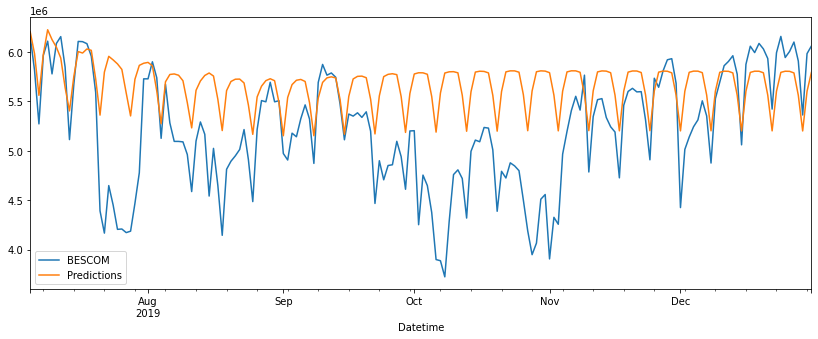

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['BESCOM'],test['Predictions']))
print(rmse)

704433.8543266346


In [ ]:
test

,BESCOM,Predictions
Datetime,,
2019-07-05,6.156214e+06,6.202296e+06
2019-07-06,5.811105e+06,5.979525e+06
2019-07-07,5.271376e+06,5.560307e+06
2019-07-08,5.963573e+06,5.972660e+06
2019-07-09,6.107762e+06,6.223405e+06
...,...,...
2019-12-27,6.099080e+06,5.786916e+06
2019-12-28,5.907196e+06,5.560810e+06
2019-12-29,5.361519e+06,5.200078e+06


In [ ]:
true_predictions

array([[6202296.00848763],
       [5979525.11806054],
       [5560306.73449285],
       [5972660.47713073],
       [6223405.25266151],
       [6124094.36137949],
       [6047211.29015208],
       [5937788.42463898],
       [5639559.33745927],
       [5402598.8666225 ],
       [5752011.61429514],
       [6002805.4962265 ],
       [5987927.44013635],
       [6029409.33247536],
       [6015131.59720198],
       [5727103.8224038 ],
       [5360249.03344426],
       [5795322.67075228],
       [5954602.33787023],
       [5918615.62924957],
       [5878084.70503753],
       [5822257.82729423],
       [5583697.94718543],
       [5352059.70298544],
       [5722908.47919247],
       [5863269.36314572],
       [5884671.47079296],
       [5893232.74772367],
       [5858999.6700829 ],
       [5604583.74737594],
       [5273515.69157444],
       [5697396.42219515],
       [5771090.73281597],
       [5776575.66138239],
       [5763269.99618322],
       [5707771.28330164],
       [5485772.09305723],
 

In [ ]:
##relative error
def mean_absolute_percentage_error(y_test,y_pred):
    return np.mean(np.abs(((y_test-y_pred)/y_test)))*100

In [ ]:
print(mean_absolute_percentage_error(test['Predictions'],test['BESCOM'].values))

9.562814567459712
